##  Разведывательный анализ данных 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого мы разделим их на 4 сегменты по результатам госэкзамена и определим какие условия жизни образования больше влияют на их успеваемость и составим приоритет мер, которых необходимо принять для улучшения этого показателя.
Сегменты учащихся
1. Высокая успеваемость (score > 85)
2. Средняя успеваемость (score => 70 and score <= 85)
2. Низкая успеваемость (score => 50 and score <= 69)
2. Группа риска (score < 50)

В датасете представлены данные которые по разному влияяют на результат. Их можно делить на три группы.
1. Напрямую влияющие (absences, freetime ...)
2. Косвенно влияющие (higher, internet, romantic, famrel ...)
3. Не влияющие (sex, address, famsize ...)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Первичный анализ данных

In [2]:
data = pd.read_csv('stud_math.csv')

# Удаляем строки в которых неизвестен score
data = data[data['score'].notna()]

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [11]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [16]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,389.000000,386.000000,365.000000,361.000000,382.000000,367.000000,382.000000,362.000000,380.000000,382.000000,374.000000,378.000000,389.000000
mean,16.673522,2.766839,2.627397,1.434903,2.036649,0.326975,-6.109948,3.930939,3.223684,3.094241,3.529412,7.320106,52.262211
std,1.265662,1.094277,2.241790,0.692660,0.847239,0.729479,2.541716,0.931554,0.993364,1.116104,1.402006,23.615525,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

### 1.1 Определение функций помощников

In [19]:
data.drop('studytime, granular', axis=1, inplace=True)
data['segment'] = data['score'].apply(lambda x: 1 if x > 85 else 2 if x <= 85 and x >= 70
                                     else 3 if x < 70 and x >= 50 else 4)


In [20]:

def clean(col, minVal, maxVal):
    data[col] = data[col].apply(lambda x: x if x in range(minVal,maxVal+1) else None)

def validateBoolVals(data):
    if 'yes' not in data: data['yes'] = 0 
    if 'no' not in data:  data['no'] = 0
    return data

def seg(data, column, num):
    return data[data['segment'] == num][column].dropna().value_counts()

def cleanData():
    
    for col in ['Medu', 'Fedu']:
        clean(col, 0,4)
    
    for col in ['traveltime', 'studytime']:
        clean(col, 1,4)
    clean('failures', 0,3)
    
    for col in ['famrel', 'freetime', 'goout', 'health']:
        clean(col, 1,5)
    
    
    
def calcPct(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    for i in range(len(allvals)):
        if absolute == allvals[i]:
            
            if i % 2 == 0:
                total = allvals[i+1] + absolute                
                percent = absolute / total * 100 
            else:
                total = allvals[i-1] + absolute
                percent = absolute / total * 100
    return "{:.1f}% ({:d})".format(percent, absolute)

def blVals(data, column, label, options=['no', 'yes']):
    fig, ax = plt.subplots(figsize=(6,6))
    size = 0.2
    
    seg1 = validateBoolVals(seg(data, column, 1))
    seg2 = validateBoolVals(seg(data, column, 2))
    seg3 = validateBoolVals(seg(data, column, 3))
    seg4 = validateBoolVals(seg(data, column, 4))
    
    
    vals = np.array([
        [seg1[options[1]], seg1[options[0]]], 
        [seg2[options[1]], seg2[options[0]]], 
        [seg3[options[1]], seg3[options[0]]], 
        [seg4[options[1]], seg4[options[0]]]
    ])

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.array([9,1,13,5]))
    inner_colors = cmap([10, 11, 2, 3, 14, 15,6,7])

    ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'))

    wedges, texts, autotexts = ax.pie(
        vals.flatten(), 
        radius=1-size, 
        colors=inner_colors,
        autopct=lambda pct: calcPct(pct, vals.flatten()),
        wedgeprops=dict(width=size*2, edgecolor='w'), 
        textprops=dict(color="black")
    )
    
    plt.setp(autotexts, size=8)
    ax.set(aspect="equal", title=label)
    plt.show()

In [21]:
def calcRatesPct(clmData):
    result = [0,0,0,0,0]
    
    total = clmData.sum()
    for i,v in clmData.items():
        if i > 0 and i < 6:
            result[int(i-1)] = int(round(v / total * 100))

    return result
    
def plotRates(data, column):
    states = ['Очень плохо', 'Плохо',
                      'Нормально', 'Хорошо', 'Отлично']
    segments = {
        '1-Сегмент': calcRatesPct(seg(data, column, 1)),
        '2-Сегмент': calcRatesPct(seg(data, column, 2)),
        '3-Сегмент': calcRatesPct(seg(data, column, 3)),
        '4-Сегмент': calcRatesPct(seg(data, column, 4)),
    }
    
    makePlot(segments, states)
    plt.show()

def makePlot(segments, states):
    labels = list(segments.keys())
    data = np.array(list(segments.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(states, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c))+'%', ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(states), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

def get_boxplot(data,column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# Анализ по сегментам

In [24]:
cleanData()
data['segment'].value_counts()

3    162
4    127
2     82
1     18
Name: segment, dtype: int64

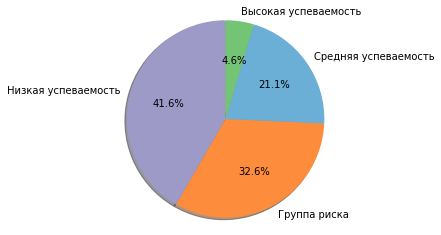

In [25]:
labels = ('Низкая успеваемость', 'Группа риска', 'Средняя успеваемость', 'Высокая успеваемость')
fig1, ax1 = plt.subplots()
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([13,5,1,9]))
ax1.pie(data['segment'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  
plt.show()

# Анализ по сегментам (анализ булевых столбцов)

In [ ]:
# нужно запускать

blVals(data, 'school', 'аббревиатура школы, в которой учится ученик', ['GP','MS'])
blVals(data, 'sex', 'пол ученика (F - женский, M - мужской)', ['F','M'])
blVals(data, 'address', ' тип адреса ученика (U - городской, R - за городом)', ['R','U'])
blVals(data, 'famsize', 'размер семьи(LE3 <= 3, GT3 >3)', ['LE3','GT3'])
blVals(data, 'schoolsup', 'дополнительная образовательная поддержка')
blVals(data, 'famsup', 'семейная образовательная поддержка')
blVals(data, 'paid', 'дополнительные платные занятия по математике')
blVals(data, 'activities', 'дополнительные внеучебные занятия')
blVals(data, 'nursery', 'посещал детский сад')
blVals(data, 'higher', 'хочет получить высшее образование')
blVals(data, 'internet', 'наличие интернета дома')
blVals(data, 'romantic', 'в романтических отношениях ')


# Анализ столбцов оценочных данных

In [ ]:
# нужно запускать


plotRates(data, 'famrel')
plotRates(data, 'freetime')
plotRates(data, 'goout')
plotRates(data, 'health')

# Номинативный анализ 

In [ ]:
# нужно запускать


cols = ['Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'absences']

for col in cols:
    get_boxplot(data, col)

# Корреляционный анализ

In [29]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,segment
age,1.000000,-0.146736,-0.147952,0.073146,-0.018227,0.205919,0.054846,0.016099,0.121115,-0.068103,0.096628,-0.155726,0.181775
Medu,-0.146736,1.000000,0.626536,-0.165838,0.081032,-0.240319,-0.010205,0.038265,0.072320,-0.048331,-0.014047,0.213349,-0.221352
Fedu,-0.147952,0.626536,1.000000,-0.142170,0.013009,-0.272352,-0.026481,-0.012749,0.054938,0.017321,0.021570,0.130002,-0.124391
traveltime,0.073146,-0.165838,-0.142170,1.000000,-0.105910,0.049738,-0.039304,-0.026299,0.032629,-0.011724,-0.048242,-0.070559,0.079880
studytime,-0.018227,0.081032,0.013009,-0.105910,1.000000,-0.181947,0.029253,-0.125066,-0.053831,-0.079180,-0.025707,0.115741,-0.133603
failures,0.205919,-0.240319,-0.272352,0.049738,-0.181947,1.000000,0.000506,0.091608,0.107747,0.088013,0.058166,-0.344338,0.314881
famrel,0.054846,-0.010205,-0.026481,-0.039304,0.029253,0.000506,1.000000,0.162715,0.064314,0.100807,-0.081634,0.051219,-0.071996
freetime,0.016099,0.038265,-0.012749,-0.026299,-0.125066,0.091608,0.162715,1.000000,0.296338,0.064315,0.010745,0.019026,-0.010080
goout,0.121115,0.072320,0.054938,0.032629,-0.053831,0.107747,0.064314,0.296338,1.000000,-0.018026,-0.047954,-0.129685,0.144388
health,-0.068103,-0.048331,0.017321,-0.011724,-0.079180,0.088013,0.100807,0.064315,-0.018026,1.000000,-0.016165,-0.070460,0.105470


# Вывод

В резудьтате анадиза предоставленных данных мы пришли к такому выводу.

1. У преуспевающих студентов есть фундамент и у них почти нет другие занятия мешающие учебу.
Например. Почти 100% стужентов не состоят в романтических отношениях, относительно меньше проводят время с друзями, и имеют дружных и родителей с высоким образованием. 
А в зону риска поподают студенты которые пропускают относительно больше занятий, семейные проблемы, внеучебные неудачи плохое обеспечение и др.

Сначало проанализируем данные которые влияют на учебу напрямую затем других показателей и составим пририоритет показателей сильно влияющих на результат. 

Итак начнем...

1. Дополнительную образовательную поддержку преуспевающие студенты почти не получают. Но этот показатель не мжет дать никакой вывод так как, это на самом деле мера предпринимаемая для поддержки студентов с низкими показателями.
2. А семейная образовательная поддержка как оказалось не влияет на успеваемость. И те и другие получают поддержку почти одинаково По этому это тоже скорее всего предпринятая мера а не фактор.
3. Дополнительные платные занятия по математике тоже мера.
4. Дополнительные внеучебные звнятия тоже не влияют на результат.

Все выше перечисленные показатели не могли дать точный вывод по причине нехватки данных, либо реально не так сильно влияют на результат хотя по теорию те кто ходят на дополнительные занятия должны показать высокие результаты. Но есть и обратная сторона, тех у которых высоки результат, не нуждаются в дополнительных занятиях. 
А мы выберим третий вариант. Не можем сказать что если он получают дополнительную образовательную поддержку то плохо учится, но можем сказать что если студент плохо учится, то ему нужна дополнительная поддержка.


5. Студенты посещавшие детский сад в итоге показали высоуие результаты, разница между другими сегментами небольшая. По этому присвоим 3 приоритет (не сильно влияет).
6. Большинство студентов желают получить высшее образование, но у преуспевающих этот паказатель велик. Но опять же, разница между сегментами небольшая. 2 приоритет.
7. Наличие интернета дома со схожими показателями тоже во 2 приоритете.
8. А вот романтические отношения как оказалось сильно влияют на учебу. 1-приоритет.
9. Хорошие семейные отношения залог высоких результатов. 2-приоритет.
10. Свободное время после школы не сильно влияло на результат. 3-приоритет.
11. Проведение времени с друзьями тоже не так сильно влияло. 3-приоритет.
12. А вот показатель здоровия удивил. Не влияет.
13. Образование матери влияет но не сильно. 3-приоритет.
14. Точно также образование отца. 3-приоритет.
15. Работа родителей тоже. 3-приоритет.
16. А те студенты которые выбрали школу по репутацию или по образовательым программам показали хорошие результаты. 3-приоритет.
17. Опекун тоже не смог влиять на показатель по математике.
18. Время в пути до школы тоже не влияла.
19. Время на учёбу помимо школы в неделю мало влияет на результат. 3-й приоритет.
20. Количество внеучебных неудач сильно влияло. 1-приоритет.
21. Количество пропущенных занятий как видим показывает понижаюшую тенденцию но не сильнцю. То есть мало пропускает хорошо учится. 2-приоритет. Мне кажется здесь тоже чувствуется нехватка данных.

Интересно...

Дети матерей докторов и отцов учителей хорошо учились.
Мальчики больше преуспели чем деовчки.
Город хорошо повлиял на учебу.
Дети из больших семей хорошо учились.

И к выводам.
1-приоритет имели Количество внеучебных неудач, романтические отношения, 
2-приоритет имели Количество пропущенных занятий, Хорошие семейные отношения, Наличие интернета дома, желание получить высшее образование
3-приоритет имели Время на учёбу помимо школы, Работа и образование родителей, Свободное время после школы и проведенная с друзями. 